In [4]:
import pandas as pd
dataset=pd.read_csv("Mall_Customers.csv")
x=dataset.iloc[:,[3,4]].values


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
#!pip install hdbscan
#!pip install --upgrade scipy
#!pip install --upgrade "scipy>=1.8.0"
#!pip install pandas
!pip install seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 5.6 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 5.3 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 5.3 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.1 MB 5.1 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 5.0 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 5.0 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 4.9 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.8 MB/s  0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.3 MB 3.7 MB/s 

In [20]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=5,
                            min_samples=3,
                            cluster_selection_method='eom',
                            allow_single_cluster=True,
                            algorithm='best',
                            leaf_size=30)
y=cluster.fit_predict(x_scaled)

C:\Users\DELL\anaconda3\envs\my_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\DELL\anaconda3\envs\my_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [21]:
supervised=pd.DataFrame(dataset)
supervised['Cluster_group']=y
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


C:\Users\DELL\anaconda3\envs\my_env\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


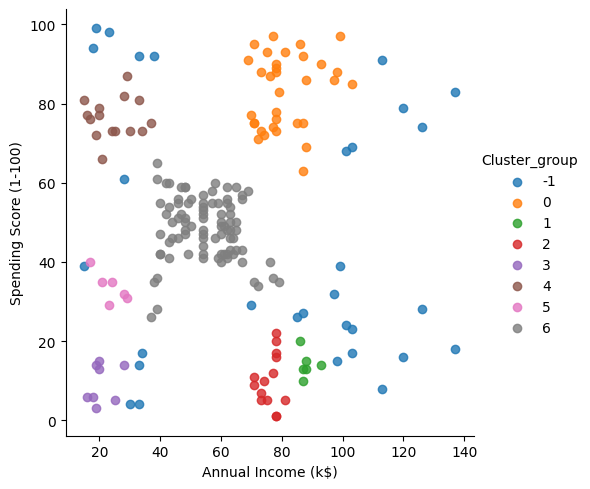

In [22]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                 fit_reg=False,legend_out=True,legend=True)